<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 2  Part 1: Two-Dimensional Signal Processing</u></b></p>

<p style="text-align: left;" ><font size="+1"><b>Learning objectives</b></p>

<div class="alert alert-block alert-warning">
<font color=black>

- Get comfortable with 2D signals/notation/etc
- Learn about 2D sampling, Nyquist, and aliasing
- Learn how to take 2D Fourier transforms and label frequencies properly

</font> 
</div>

<p style="text-align: left;" ><font size="+1"><b>Introduction</b></p>

<div class="alert alert-block alert-warning">
<font color='black'>

We’ve gone through an initial refresher of on digital signal processing in one and two dimensions. Now you will get some experience with finding the Fourier transform of specific continuous functions that you can sample and explore in Python. There are a number of details to get correct in order to label your axes properly, and we will go through things step-by-step. <br/> <br/>
Once you have some experience computing and interpreting Fourier transforms with ideal (simulated) data, we will move on to physical data acquisitions and exploration. The Fourier transform tool will be critical in subsequent labs and this lab should give you the skills necessary to apply `fft2` in subsequent experiments.
</font> 
</div>

<div class="alert alert-block alert-warning">
<b>Explore 2D signals in Python:</b> <font color='black'>

To get comfortable with two-dimensional signal processing, you will learn how to create a number of 2D signals and will be doing some basic signal processing operations on these signals. Let’s start with a basic structure for signal creation with the following Python code:
</font> 
</div>

In [16]:
# CODE BLOCK 1
import numpy as np

# Define a range of x values, Here x ranges from -10 mm to 10 mm with 201 samples inbetween (including the endpoints), at 0.1 mm increment
xr = np.linspace(-10, 10, 201)  

# Define a range of y values. The range of y is the same as x.
yr = np.linspace(-10, 10, 201)

# Create a 2D grid of x & y values
[X, Y] = np.meshgrid(xr, yr)

<div class="alert alert-block alert-warning">
<font color='black'> 

    
Display the 2D images `X` and `Y` with colorbars to confirm that these values are what you expect.
    

</font> 
</div>

Text(0, 0.5, 'y values (mm)')

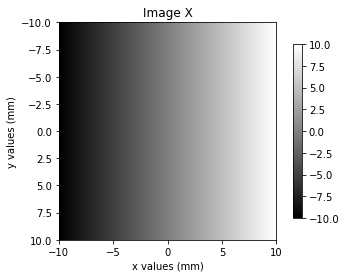

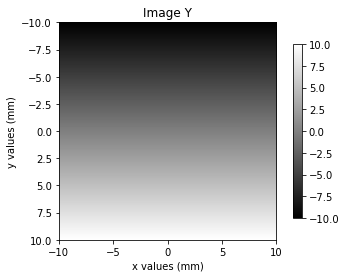

In [17]:
import matplotlib.pyplot as plt
x=plt.imshow(X, cmap='gray',extent = [-10,10,10,-10] )
plt.colorbar(x, shrink=0.8)
plt.title("Image X")
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)")
plt.figure()
y=plt.imshow(Y, cmap='gray', extent = [-10,10,10,-10])
plt.colorbar(y, shrink=0.8)
plt.title("Image Y")
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)")

Image X and Image Y look as expected. In Image X, the function changes in the x direction but is constant in the y direction and in Image Y, the function changes in the y direction but is constant in the x direction.

<div class="alert alert-block alert-success">
<font color='black'>
The above code forms a grid of coordinate values on which you can evaluate various functions. <br/> <br/>

Let’s start with the following function:
<font size="2"> `F = np.cos(np.pi*X)` </font> 
    
Plot this function below with colorbar, gray colormap, and proper axis labels. 
    
</font> 
</div>

Text(0, 0.5, 'y values (mm)')

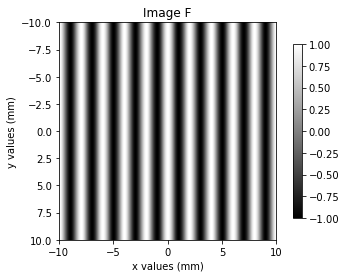

In [18]:
F = np.cos(np.pi*X)
f = plt.imshow(F, cmap='gray', extent = [-10,10,10,-10]) #change extent 
plt.colorbar(f, shrink=0.8)
plt.title("Image F")
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)")

 <div class="alert alert-block alert-warning">
<font color='black'>
We’d like to take the 2D Fourier transform of this function and display the results. To do this, first import the following functions:<br/> <br/>   

<font size="2"> `from numpy.fft import fft2, fftshift, ifftshift` </font> <br/><br/>   
    
The function `fft2` performs Fast Fourier transform. However, to use this function correctly, one needs to know several things. First, this function expects a particular organization of your 2D function. Specifically, the origin `(0,0)` of your data must be correctly placed. While the code written above is good for visualization of the function, it is not in the correct form for `fft2`.
<br/> <br/>
The figure below shows a typical interpretation of 2D image data on the left and Python’s requirement for the data prior to using `fft2`. Fortunately, a command is provided to swap data quadrants for you. The command is called `ifftshift`. 
<br/> <br/>
Note that the precise location of the origin after `ifftshift` is always in the upper left corner.
    
</font> 
</div>

<img src="SwapQuadrants.png" style="width:700px">

<div class="alert alert-block alert-warning">
<font color='black'>

Prior to using `ifftshift` the location of the origin depends on the size of the image:
- For odd-sized images, the origin lies at the center pixel.
- For even-sized images, the origin lies just to the right and below the center.

Example positions of the origin pixel (green) in odd- and even-sized images are shown below.
</font> 
</div>

<img src="OddEvenImage.png" style="width:400px">

<div class="alert alert-block alert-warning">
<font color='black'>

You can now Fourier transform your 2D-function; however, you need to know how to label the resulting Fourier-domain result. 
    
<b>Note that in the `fft2` result, the frequency origin is in the upper left corner. </b> 
    
Thus, to view the Fourier transform normally you need to apply `fftshift` to the result.

    
Recall that the Fourier transform of your function is, generally, complex-valued. Thus, to display the Fourier transform, you have to select how to display these potentially complex values. Options include displaying only real or imaginary parts (via `np.real` or `np.imag`) or the magnitude (via `np.abs`).
    
</font> 
</div>

<div class="alert alert-block alert-warning">
<font color='black'>
    
It remains to find out the coordinates for your Fourier transform data. You already know that the maximum frequency found in sampled data is given by the Nyquist frequency, which you can compute given the original sampling frequency. The frequency origin (e.g., the zero frequency DC value) is located as described above, and the Fourier transform you have taken given you both positive and negative frequencies. Thus, you should be able to label your axes. Again, there is a little complexity involved based on image size (e.g. an $N \times N$ image):
    

The Fourier domain interval is <font size="4"> $\frac{1}{N \cdot a}=\frac{f_s}{N}$ </font>, where $a$ is the sampling period<br/><br/>
The frequency axis therefore can be <br/>

- For odd-sized images, your frequency samples go from <font size="4">$(-\frac{f_s}{2}) \cdot (\frac{N-1}{N}$)</font> to <font size="4">($\frac{f_s}{2}) \cdot (\frac{N-1}{N}$)</font><br/><br/>
- For even-sized images, your frequency samples go from <font size="4">$(-\frac{f_s}{2} $)</font> to zero to <font size="4">($\frac{f_s}{2}) \cdot (\frac{N-2}{N}$)</font>

</font> 
</div>

# Question 1

In [19]:
from numpy.fft import fft2, fftshift, ifftshift

<div class="alert alert-block alert-success">

<font color='black'> <b>(a)</b> Using the x- and y-ranges given in CODE BLOCK 1 (shown above), what is the sampling frequency for your function? </font>
    
</div>

In [27]:
# confirm shape of X and Y 
print(X.shape); # (201,201)
print(Y.shape); # (201,201) both are odd valued functions

# find sampling frequency 
N = 201; # size of both images are 201x201
a = 0.1 # sampling period is every 0.1 mm 
fs = (1 / (N*a)) * N

print("The sampling frequency is", fs, "(mm)^-1")

(201, 201)
(201, 201)
The sampling frequency is 10.0 (mm)^-1


<div class="alert alert-block alert-success">    
    
<font color='black'> <b>(b)</b> Given this sampling frequency, what is the Nyquist frequency?  </font>     
    

</div>

The Nyquist frequency is example one half of the sampling frequency. 

Nyquist frequency is 10 / 2 = 5.0 $mm^{-1}$. 

<div class="alert alert-block alert-success">    
<font color='black'> <b>(c)</b> Recall that Fourier coefficients are complex valued. Show the real, imaginary, and magnitude components of your Fourier-transformed function with properly labeled axes and colorbars.   </font>
   
</div>

Text(0, 0.5, 'y frequency (1/mm)')

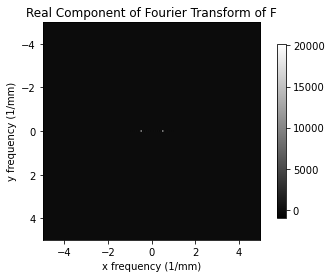

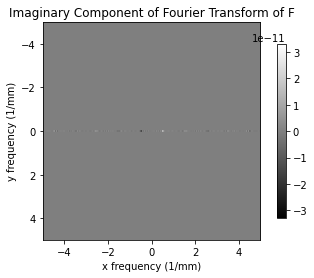

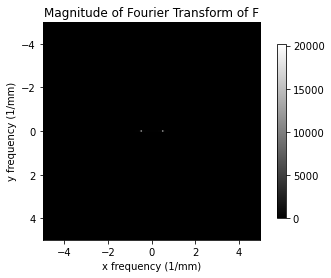

In [28]:
# Fourier Transform
Fft = fftshift(fft2(ifftshift(F)))

#Real Component
plt.figure()
real_F_plot = plt.imshow(np.real(Fft), cmap = "gray", extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
plt.colorbar(real_F_plot, shrink=0.8)
plt.title("Real Component of Fourier Transform of F")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")

# Imaginary part
plt.figure()
imag_F_plot = plt.imshow(np.imag(Fft), cmap = "gray", extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
plt.colorbar(imag_F_plot, shrink=0.8)
plt.title("Imaginary Component of Fourier Transform of F")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")

# Magnitude
plt.figure()
magn_F_plot = plt.imshow(np.abs(Fft), cmap = "gray", extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
plt.colorbar(magn_F_plot, shrink=0.8)
plt.title("Magnitude of Fourier Transform of F")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")

<div class="alert alert-block alert-success">    
<font color='black'> <b>(d)</b> Explain what you see in these images. (e.g. Where are peaks found, how do real, imaginary, and magnitude components compare, etc.?)   </font>
   
</div>

Looking at the images of the real FFT and magnitude FFT, you see two distinct peaks at approximately (x=0.5, y=0) and (x=-0.5, y=0). Looking at the original function F, there is no change in the y-direction. This is why the peaks occur at a y-frequency of 0 1/mm. Moreover, the coefficient in the cosine funciton for F is pi. Therefore, we can calculate the frequency in the x-direction (2pif=pi, f=0.5). This is why the peaks show at x-frequency +/- 0.5 1/mm. Because the frequency is constant in the x-direction, it makes sense that these are the only peaks observed in the fourier transform. You can see some peaks in the imaginary graph along y=0 and +/- 0.5 as well as other peaks an equal distance away. However, when you look at the function values, these peaks are very close to zero and are likely a result of rounding errors.

# Question 2

<div class="alert alert-block alert-success">    
<font color='black'>

Change your function to `np.cos(np.pi*X+np.pi/2)` and show the real, imaginary, and magnitude components again. <br/>Why do they look like they do?   </font>
    
</div>

Text(0, 0.5, 'y frequency (1/mm)')

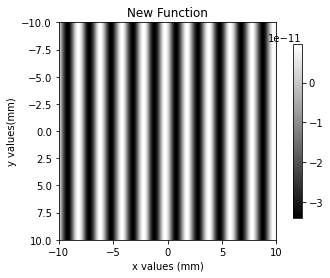

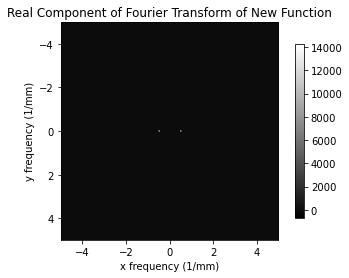

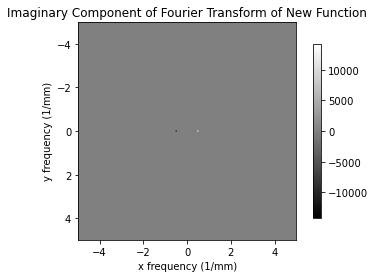

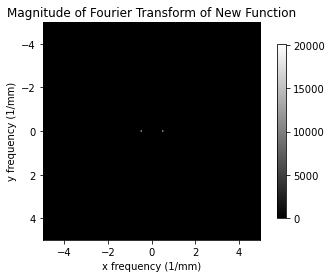

In [35]:

new_F = np.cos((np.pi*X)+(np.pi/4))
plt.figure()
new_F_plot = plt.imshow(new_F, cmap = "gray",extent = [-10,10,10,-10])
plt.colorbar(real_F_plot, shrink=0.8)
plt.title("New Function")
plt.xlabel("x values (mm)")
plt.ylabel("y values(mm)")

# Fourier Transform
Fft1 = fftshift(fft2(ifftshift(new_F)))
                    
#Real Component
plt.figure()
real_F_plot = plt.imshow(np.real(Fft1), cmap = "gray", extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
plt.colorbar(real_F_plot, shrink=0.8)
plt.title("Real Component of Fourier Transform of New Function")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")

# Imaginary part
plt.figure()
imag_F_plot = plt.imshow(np.imag(Fft1), cmap = "gray", extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
plt.colorbar(imag_F_plot, shrink=0.8)
plt.title("Imaginary Component of Fourier Transform of New Function")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")

# Magnitude
plt.figure()
magn_F_plot = plt.imshow(np.abs(Fft1), cmap = "gray", extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
plt.colorbar(magn_F_plot, shrink=0.8)
plt.title("Magnitude of Fourier Transform of New Function")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")

Compared to the last function (fourier transform of F), the peaks are in the same locations (x=0.5, y=0) and (x=-0.5, y=0). However, we see the peaks occur on the imaginary graph rather than the real component. The magnitude graphs are the same between the two functions. This likely occurs because we are adding a spatial shift to F to obtain this new function which we will call new_F. This means that new_F is representative of a sine function with the same frequency as F: new_F = Cos(pi*X+(pi/2)) = Sin(pi*X). Thus, the imaginary and real images are essentially switched because the frequencies of sine functions are frequencies with imaginary components and the frequencies of cosine functions are frequencies with real components (known and understood through examples such as the Euler's formula). However, the magnitudes of the two functions are the same as magnitude takes into account both real and imaginary parts. Additionally it is seen in the imaginary component of the fourier transformation of new_F that the peaks are the same magnitude but opposite signs. This is likely because complex numbers come in conjugates. The complex conjugate of an imaginary number is the opposite imaginary number (ie +i & -i). This could cause the function values to have opposite signs at the two peaks. This also explains why the first function's peaks both had positive magnitudes because the complex conjugate of a real number is the same number (ie 1+0i & 1-0i OR 1 & 1). 

# Question 3

<div class="alert alert-block alert-success">    
<font color='black'> 
    
For the following functions, show the properly labeled image-domain and Fourier transform pairs (real and magnitude):   


- `np.cos(np.pi*X + 2*np.pi*Y)`
    
- `np.cos(np.pi*X + 4*np.pi*Y)`


Describe the difference between these two functions.
</div>

Text(0, 0.5, 'y frequency (1/mm)')

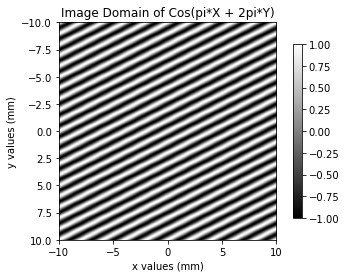

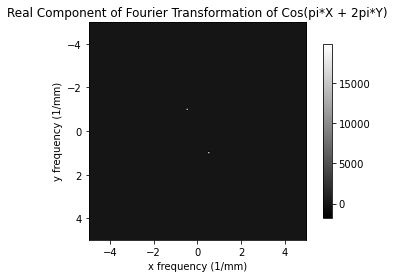

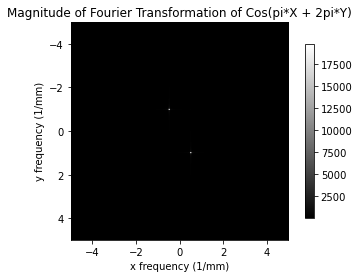

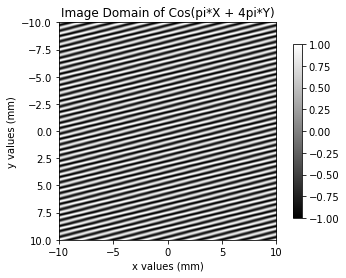

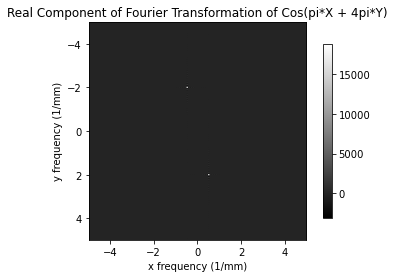

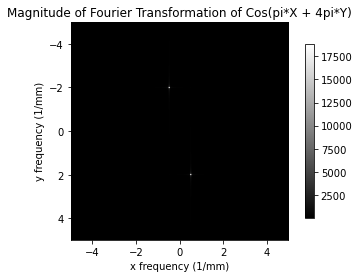

In [36]:
# save the above functions in variables
func1 = np.cos(np.pi*X + 2*np.pi*Y); 
func2 = np.cos(np.pi*X + 4*np.pi*Y); 

# create fft pairs 
Ffunc1 = fftshift(fft2(ifftshift(func1)))
Ffunc2 = fftshift(fft2(ifftshift(func2)))

# plot image domain of function 1 
F1 = plt.imshow(func1, cmap = "gray",extent = [-10,10,10,-10])
plt.colorbar(F1, shrink=0.8)
plt.title("Image Domain of Cos(pi*X + 2pi*Y)")
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)")

# plot the real Fourier transform of function 1
plt.figure()
fftR1 = plt.imshow(np.real(Ffunc1), cmap = "gray", extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
plt.colorbar(fftR1, shrink=0.8)
plt.title("Real Component of Fourier Transformation of Cos(pi*X + 2pi*Y)")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")

# plot the magnitude of Fourier transform of function 1
plt.figure()
fftM1 = plt.imshow(np.abs(Ffunc1), cmap = "gray", extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
plt.colorbar(fftM1, shrink=0.8)
plt.title("Magnitude of Fourier Transformation of Cos(pi*X + 2pi*Y)")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")

# plot image domain of function 2 
plt.figure()
F2 = plt.imshow(func2, cmap = "gray", extent = [-10,10,10,-10] )
plt.colorbar(F2, shrink=0.8)
plt.title("Image Domain of Cos(pi*X + 4pi*Y)")
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)")

# plot the real Fourier transform of function 2
plt.figure()
fftR = plt.imshow(np.real(Ffunc2), cmap = "gray", extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
plt.colorbar(fftR, shrink=0.8)
plt.title("Real Component of Fourier Transformation of Cos(pi*X + 4pi*Y)")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")

# plot the magnitude of Fourier transform of function 2
plt.figure()
fftR = plt.imshow(np.abs(Ffunc2), cmap = "gray", extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
plt.colorbar(fftR, shrink=0.8)
plt.title("Magnitude of Fourier Transformation of Cos(pi*X + 4pi*Y)")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")

As you can see, the above graphs demonstrate the image domain, and real values and magnitude of the fourier transforms of the two functions given. The difference between the two functions is that in the second function, the Y is being multiplied by 4 rather than 2, which doubles the frequency in the y-domain of the function but the x-frequency doesn't change. This is evident by first looking at the image domain. The number of times that the lines switch from black to white remains the same on the x-axis of both domains, but there are twice as many switches / lines on the y-axis of the second image domain. This means that the period of the second function is shorter than the first function on the y-axis and the same on the x-axis. This change is also shown in the fourier transform graphs as the frequency of the y-axis is twice as high in the second doman, but the x-frequencies stay the same. For the first function, the frequency peaks are at (x=0.5, y=1) and (x=-0.5, y=-1) (X: 2pif=pi, f=0.5; Y: 2pif=2pi, f=1). For the second function, the peaks are at (x=0.5, y=2) and (-0.5, y=-2) (X: 2pif=pi, f=0.5; Y: 2pif=4pi, f=2).

# Question 4

<div class="alert alert-block alert-success">    
<font color='black'> 

Next consider:
`(np.abs(X)<sz) * (np.abs(Y)<sz) for sz={0.2, 0.5, 1.0}` 

Describe the difference between these three functions.
</div>

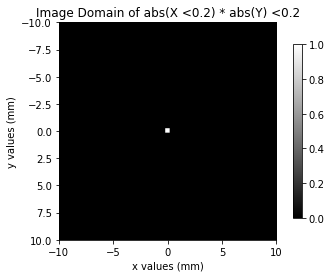

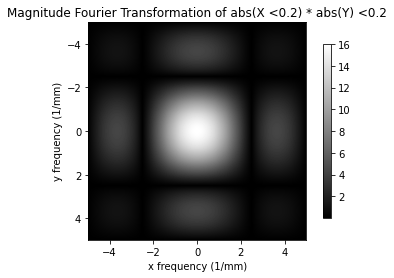

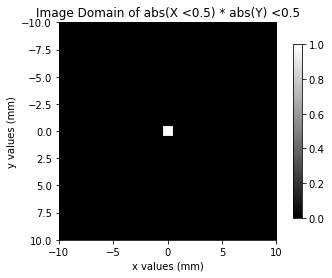

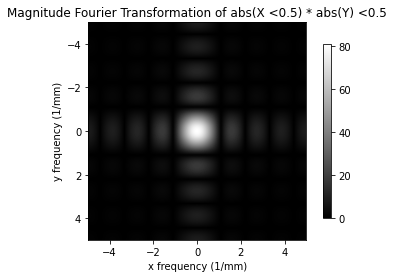

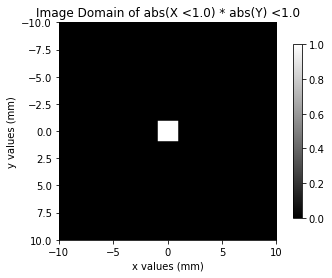

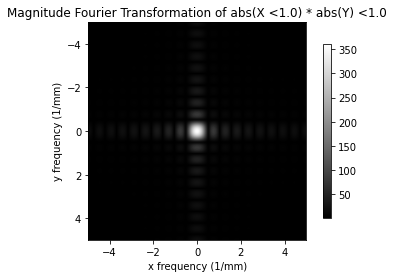

In [37]:
sizes = [0.2,0.5, 1.0]
for sz in sizes:
    func = (np.abs(X)<sz) * (np.abs(Y)<sz)
    # create fft pair
    Ffunc = fftshift(fft2(ifftshift(func)))
    # plot image domain of function 1 
    plt.figure()
    F1 = plt.imshow(func, cmap = "gray",extent = [-10,10,10,-10] )
    plt.colorbar(F1, shrink=0.8)
    plt.title("Image Domain of abs(X <" + str(sz)+ ") * abs(Y) <" + str(sz) )
    plt.xlabel("x values (mm)")
    plt.ylabel("y values (mm)")
    

    # plot the magnitude of Fourier transform of function 1
    plt.figure()
    fftM1 = plt.imshow(np.abs(Ffunc), cmap = "gray", extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
    plt.colorbar(fftM1, shrink=0.8)
    plt.title("Magnitude Fourier Transformation of abs(X <" + str(sz)+ ") * abs(Y) <" + str(sz))
    plt.xlabel("x frequency (1/mm)")
    plt.ylabel("y frequency (1/mm)")

In [ ]:
  # plot the real Fourier transform of function 1
    plt.figure()
    fftR1 = plt.imshow(np.real(Ffunc), cmap = "gray", extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
    plt.colorbar(fftR1, shrink=0.8)
    plt.title("Real Fourier Transformation of abs(X <" + str(sz)+ ") * abs(Y) <" + str(sz))
    plt.xlabel("x frequency (1/mm)")
    plt.ylabel("y frequency (1/mm)")

This exercise essentially asks us to plot the 2D rect function with increasing periods. The fourier transform of the rect function is the sinc function ($sinc(t) = sin(pi*t)/(pi*t$). As sz increases, you can see the square increase in size in the image domain. When applying the fourier transform, the period of the image domain relates to the frequency of the function in the image domain. As sz increases, you can see a more rapid light/dark cycle in the fourier domain. Also, when sz increases, the fourier transform function values also increase, which can be seen in the colorbar. This is due to the scaling effect of the fourier transform causing the highest peak to have a greater magnitude when sz increases. The relationship between sz and the frequency and magnitude of the fourier transforms are expressed in the following equations.

$ f(x,y) = rect(x,y) $ where $f(t) = 1$ when $ -sz/2 < x,y < sz/2$ </br>
$ F(u,v) = fft(f(x,y)) = sz * sinc(u*sz, v*sz) $

# Question 5

<div class="alert alert-block alert-success">    
<font color='black'> 
    
We are often interested in signal power in decibels which requires a logarithmic scaling of the frequency values. <br/><br/>
Show properly labeled image-domain and Fourier transform pairs (real, magnitude, and log10 magnitude) for the following functions:
    

`np.sqrt(X**2 + Y**2)<sz for sz={1.0, 2.0}`
 
Why might you prefer to look at log10 data?
</div>

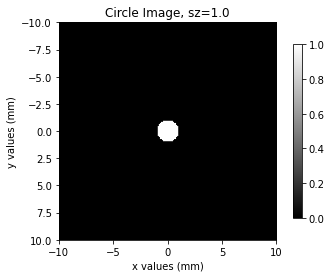

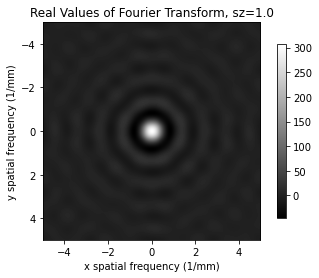

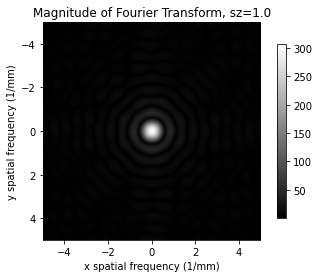

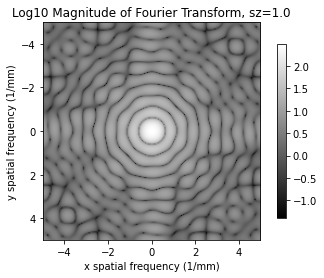

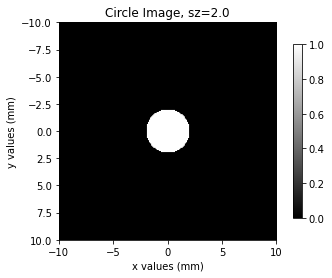

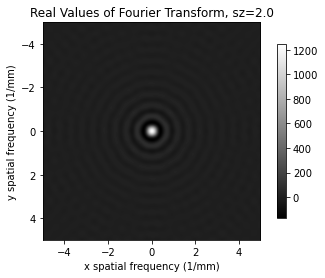

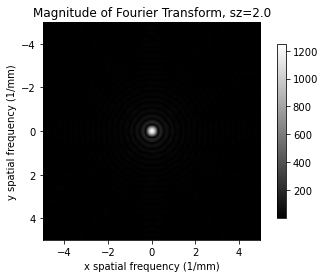

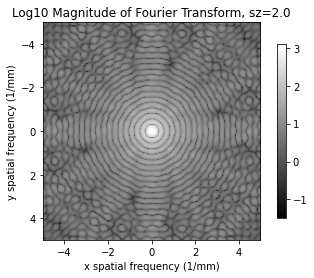

In [40]:
# Changing sz
sizes = [1.0,2.0]
for sz in sizes:
    # Plot Image-Domain
    C = np.sqrt(X**2 + Y**2)<sz
    plt.figure()
    c = plt.imshow(C, cmap='gray', extent = [-10,10,10,-10])
    plt.colorbar(c, shrink=0.8)
    plt.title("Circle Image, sz=" + str(sz))
    plt.xlabel("x values (mm)")
    plt.ylabel("y values (mm)")
    # Take Fourier Transform
    FC = fftshift(fft2(ifftshift(C)))
    # Plot Real Values of Fourier Transform
    plt.figure()
    c = plt.imshow(np.real(FC), cmap='gray', extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
    plt.colorbar(c, shrink=0.8)
    plt.title("Real Values of Fourier Transform, sz=" + str(sz))
    plt.xlabel("x spatial frequency (1/mm)")
    plt.ylabel("y spatial frequency (1/mm)")
    # Plot Magnitude of Fourier Transform
    plt.figure()
    c = plt.imshow(np.abs(FC), cmap='gray', extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
    plt.colorbar(c, shrink=0.8)
    plt.title("Magnitude of Fourier Transform, sz=" + str(sz))
    plt.xlabel("x spatial frequency (1/mm)")
    plt.ylabel("y spatial frequency (1/mm)")
    # Plot log10 Magnitude of Fourier Transform
    plt.figure()
    c = plt.imshow(np.log10(np.abs(FC)), cmap='gray', extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
    plt.colorbar(c, shrink=0.8)
    plt.title("Log10 Magnitude of Fourier Transform, sz=" + str(sz))
    plt.xlabel("x spatial frequency (1/mm)")
    plt.ylabel("y spatial frequency (1/mm)")

Looking at the log10 magnitude of the fourier transform is preferable because the range of function values of the fourier transform is quite large as it covers a range of multiple magnitudes, so it will be hard to see any contrast between values that are relatively close to one another compared to the entire range of magnitudes present in the image. By looking at the image on a logarithmic scale, we are able to better see the nuance in the image between pixels that are different by orders of magnitude. On a linear scale, it is difficult to discern any information about the image because there is a lot of fourier transform values that appear the same. On a logarithmic scale, the images actually show meaningful information about the relative fourier transform values. 

# Question 6

<div class="alert alert-block alert-success">    
<font color='black'> 
    
We know that sampling limits our representation of the underlying function. <br/><br/>
Show properly labeled image-domain and Fourier transform pairs (magnitude only) for the following functions:

- `np.cos(np.pi*(X+Y)*m) for m={3,6,12,18}` 
- `np.sin(np.sqrt(X**2+Y**2)*m) for m={10,20,40}` <br/>

Describe what you see and explain.
</div>

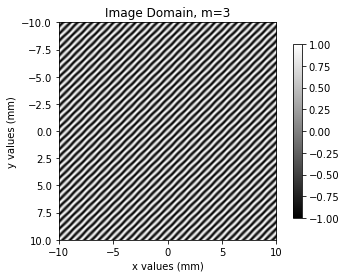

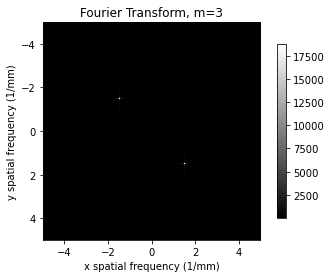

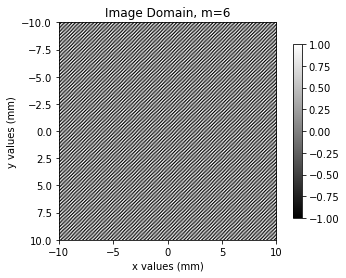

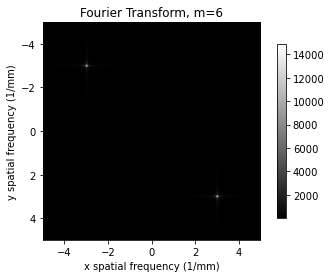

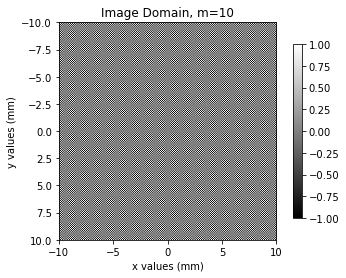

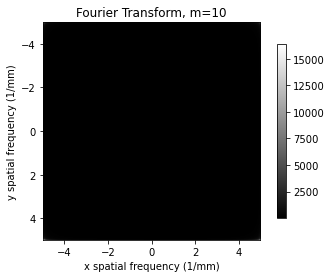

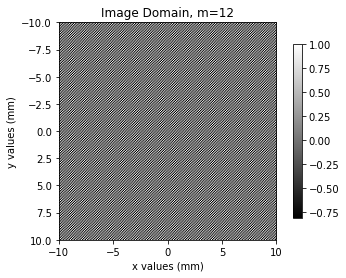

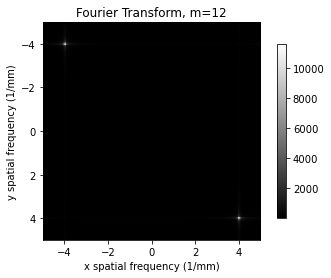

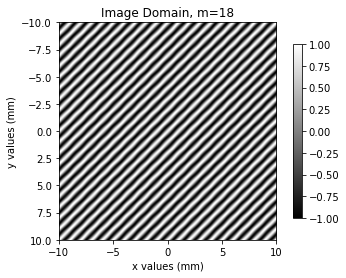

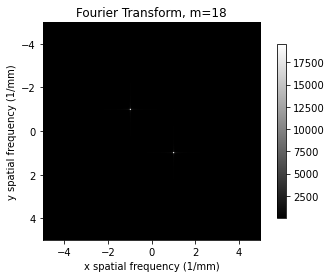

In [42]:
# Changing m
mvals = [3,6,10,12,18]
for m in mvals:
    # Plotting Image-Domain
    F = np.cos(np.pi*(X+Y)*m)
    plt.figure()
    f = plt.imshow(F, cmap='gray', extent = [-10,10,10,-10])
    plt.colorbar(f, shrink=0.8)
    plt.title("Image Domain, m=" + str(m))
    plt.xlabel("x values (mm)")
    plt.ylabel("y values (mm)")
    # Plotting Fourier Transform
    plt.figure()
    f = plt.imshow(np.abs(fftshift(fft2(ifftshift(F)))), cmap='gray', extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
    plt.colorbar(f, shrink=0.8)
    plt.title("Fourier Transform, m=" + str(m))
    plt.xlabel("x spatial frequency (1/mm)")
    plt.ylabel("y spatial frequency (1/mm)")

Increasing m increases the frequency of the function we are trying to image. As you can see from the m=3 and 6 images, the light-dark cycles repeat at higher at a higher frequncy with m. However, m=18 breaks away from this trend and the frequency of the image appears lower than all of the previous ones. Moreover, the fft peak locations for m=12 show that the frequency of the image is lower than expected. This is due to frequency of our data exceeding the Nyquist frequency and causing our images to no longer be proper representations of the functions we are trying to display (aliasing). The frequency of this function will be the same for both X and Y: (2pif = m$*$pi), f = m/2. The sampling frequency that we have for X and Y is $10mm^{-1}$ so the Nyquist frequency is $5mm^{-1}$. When m=12 or 18, $f=6mm^{-1} and f=9mm^{-1}$. These frequencies both exceed the Nyquist frequency which is why we observe aliasing at these m values and not 3 or 6.

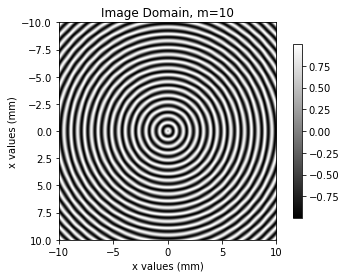

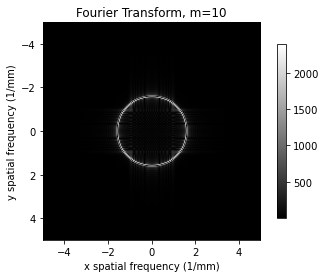

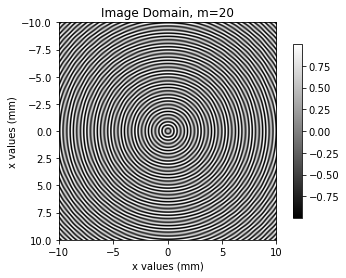

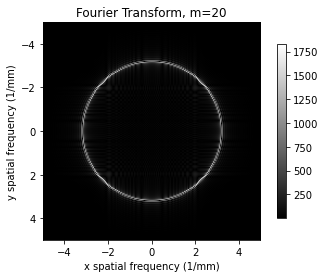

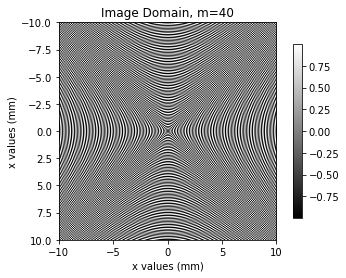

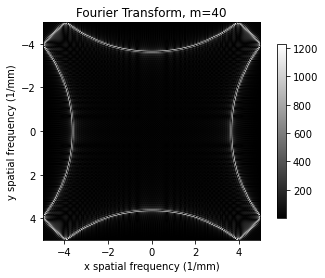

In [44]:
# Changing m
mvals = [10,20,40]
for m in mvals:
    # Plotting Image Domain
    F = np.sin(np.sqrt(X**2+Y**2)*m)
    plt.figure()
    f = plt.imshow(F, cmap='gray', extent = [-10,10,10,-10])
    plt.colorbar(f, shrink=0.8)
    plt.title("Image Domain, m=" + str(m))
    plt.xlabel("x values (mm)")
    plt.ylabel("x values (mm)")
    # Plotting Fourier Transform
    plt.figure()
    f = plt.imshow(np.abs(fftshift(fft2(ifftshift(F)))), cmap='gray', extent = [(-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(fs/2)*((N-1)/N),(-fs/2)*((N-1)/N)])
    plt.colorbar(f, shrink=0.8)
    plt.title("Fourier Transform, m=" + str(m))
    plt.xlabel("x spatial frequency (1/mm)")
    plt.ylabel("y spatial frequency (1/mm)")

As m increases, the frequency of our function also increases. The function describes constant frequencies in a radial direction, causing the image to show the light-dark cycles as a series of concentric rings. For m=10 and m=20, you can see that the frequency of these rings incresaes. However, when m=40 the shape of the image changes and no longer looks like concentric rings. This is another failure of having too slow of a sampling rate. At m=40, the radial frequency of the image exceeds the Nyquist frequency. This time, it caused an unwanted change in the image's appearance. Increasing the sampling rate would to a sufficient frequency would make the image display the expected set of concentric rings. 

$2\pi f=m, f=m/(2\pi)$ </br>
$m=40, f=6.37 mm^{-1} > 5 mm^{-1}$